In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_dictionary = pd.read_csv('.\..\data\diccionario_de_datos\denue_diccionario_de_datos.csv', encoding='latin1', header=1)
raw_data = pd.read_csv('.\..\data\conjunto_de_datos\denue_inegi_62_.csv', encoding='latin1')

C:\Users\ruben\AppData\Local\Temp\ipykernel_1140\1653580122.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('.\..\data\conjunto_de_datos\denue_inegi_62_.csv', encoding='latin1')


In [3]:
raw_data.columns

Index(['id', 'clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www',
       'tipoUniEco', 'latitud', 'longitud', 'fecha_alta'],
      dtype='object')

In [4]:
interest_columns = ['per_ocu','latitud', 'longitud']
interest_df = raw_data[interest_columns]

In [5]:
label_dict = dict()
for i,label in enumerate(interest_df['per_ocu'].unique()):
    label_dict[label] = i

interest_df['tag'] = interest_df['per_ocu'].replace(label_dict)

C:\Users\ruben\AppData\Local\Temp\ipykernel_1140\809808694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df['tag'] = interest_df['per_ocu'].replace(label_dict)


In [6]:
interest_df.head()

,per_ocu,latitud,longitud,tag
0,0 a 5 personas,21.879700,-102.275355,0
1,31 a 50 personas,21.882548,-102.306592,1
2,0 a 5 personas,21.873174,-102.270598,0
3,11 a 30 personas,21.845172,-102.722171,2
4,0 a 5 personas,21.877198,-102.333976,0


In [7]:
N = len(interest_df['per_ocu'].unique())

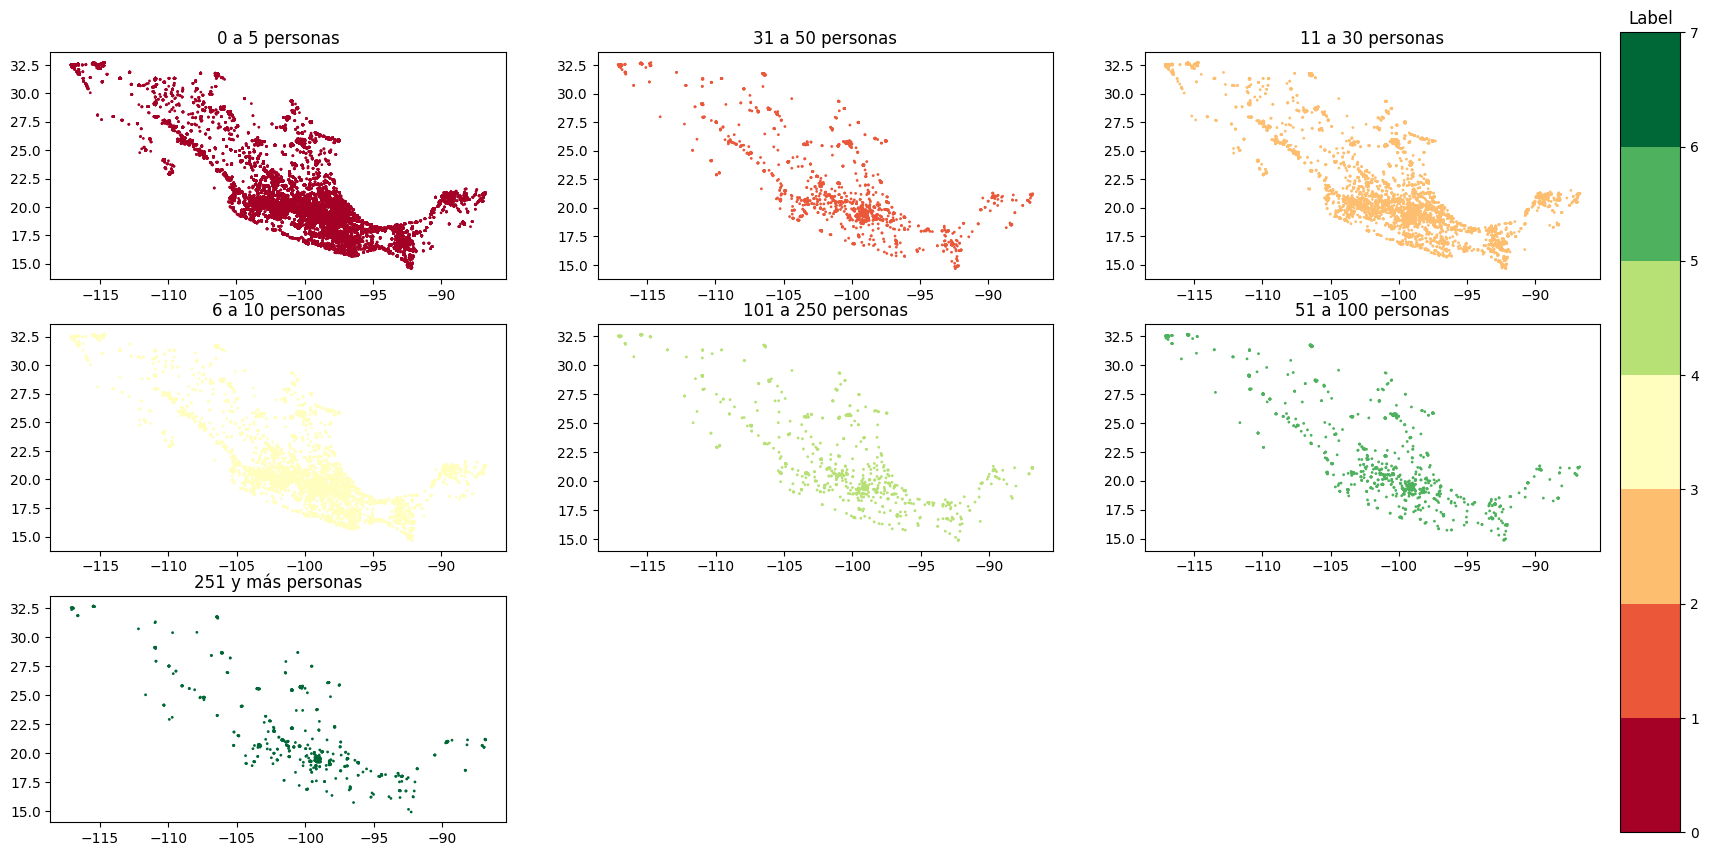

In [21]:
fig, axes = plt.subplots(3,3, figsize=(20,10))

cmap = plt.cm.RdYlGn
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom map', cmaplist, cmap.N)

bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for i in range(7):
    x = interest_df.loc[interest_df['tag'] == i]['longitud']
    y = interest_df.loc[interest_df['tag'] == i]['latitud']
    tag = interest_df.loc[interest_df['tag'] == i]['tag']
    scat_plt = axes.flat[i].scatter(x,y, c=tag, s=1, cmap=cmap, norm=norm)
    axes.flat[i].set_title(list(interest_df['per_ocu'].unique())[i])

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][1])

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes((0.91, 0.1, 0.03, 0.8))
cbar_ax.set_title('Label')
fig.colorbar(scat_plt, spacing='proportional',ticks=bounds,cax=cbar_ax)

plt.show()